In [25]:
import numpy as np # for numerical operations
from prettytable import PrettyTable # for printing tables
from matplotlib import pyplot as plt # for plotting

In [26]:
def show_history(histrory: dict):
    table = PrettyTable()
    for key in histrory.keys():
        table.add_column(key, histrory[key])
    print(table)


def plot_history(history: dict):
    plt.close("all")
    # Figure of subplots to show the 1. loss over epcohs  2. k over epochs near target_k=3 3. b over epochs near target_b=2 4. k_gradient over epochs 5. b_gradient over epochs 6. lr over epochs
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    axs[0, 0].plot(history["epoch"], history["loss"])
    axs[0, 0].set_title("Loss over epochs")

    axs[0, 1].plot(history["epoch"], history["k"])
    axs[0, 1].set_title("k over epochs")
    axs[0, 1].axhline(y=3, color="r", linestyle="-", label="target k=3")
    axs[0, 1].legend()

    axs[1, 0].plot(history["epoch"], history["k_gradient"])
    axs[1, 0].set_title("k_gradient over epochs")

    axs[1, 1].plot(history["epoch"], history["lr"])
    axs[1, 1].set_title("lr over epochs")

    plt.tight_layout()
    plt.show()

In [27]:
history = {
    "epoch": [],
    "loss": [],
    "k": [],
    "k_gradient": [],
    "lr": [],
}

TARGET_K = 3

x = np.array([0, 1, 2, 3, 4, 5])
y = TARGET_K * x

In [28]:
EPOCHS = 15
k = 0.5
lr = 0.01

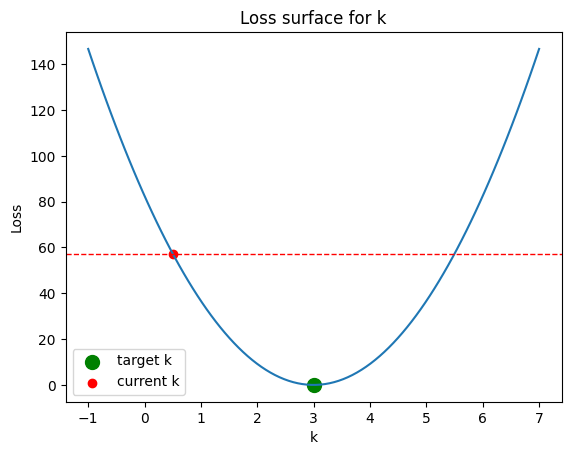

In [29]:
# create a figure that represents a gradient pool for k
# how? we will plot the loss funciton for different k values and then place current k value on the plot to see where it is
# for b, we will do later

k_pool = np.linspace(-k * 10, k * 10, 100)
k_pool = np.linspace(TARGET_K - 4, TARGET_K + 4, 100)

losses = []
for k_ in k_pool:
    y_pred = k_ * x 
    loss = np.mean((y - y_pred) ** 2)
    losses.append(loss)


# we already have the losses for k_pool
def plot_k_loss_surface(k):
    loss = np.mean((y - k * x) ** 2)

    plt.plot(k_pool, losses)
    
    plt.axhline(y=loss, color='r', linestyle='--', linewidth=1)
    plt.scatter(TARGET_K, 0, color="g", label="target k", s=100)
    plt.scatter(k, loss, color="r", label="current k")

    plt.legend()
    plt.xlabel("k")
    plt.ylabel("Loss")
    plt.title("Loss surface for k")
    plt.show()


plot_k_loss_surface(k)

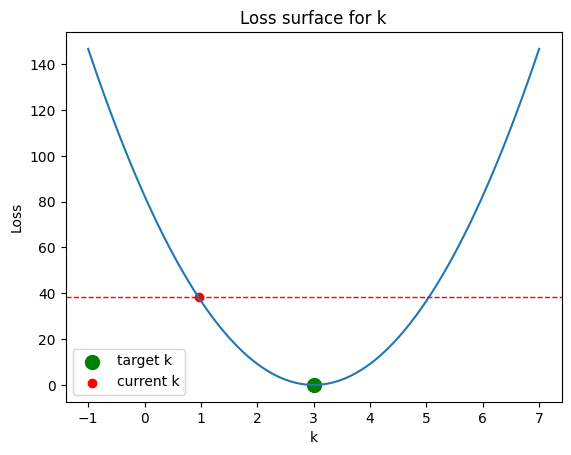

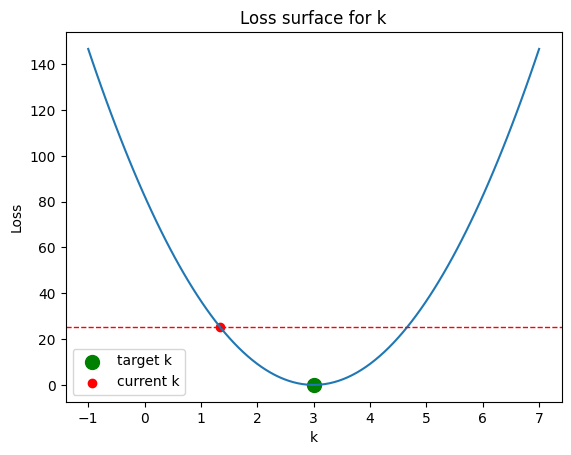

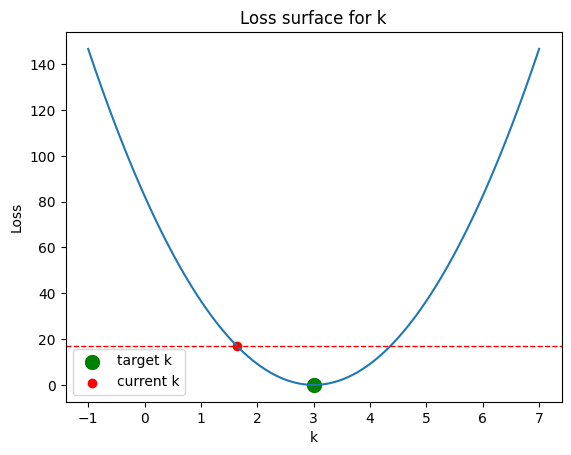

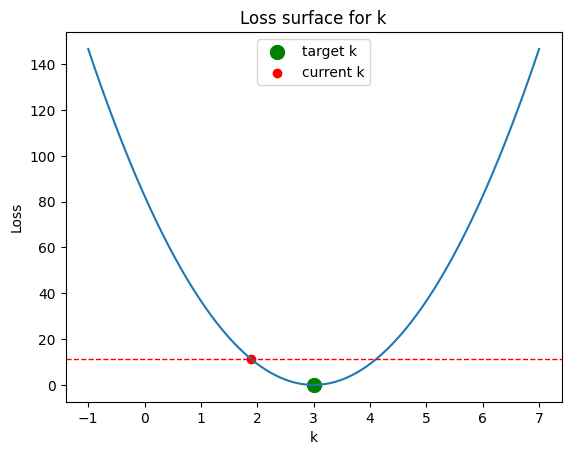

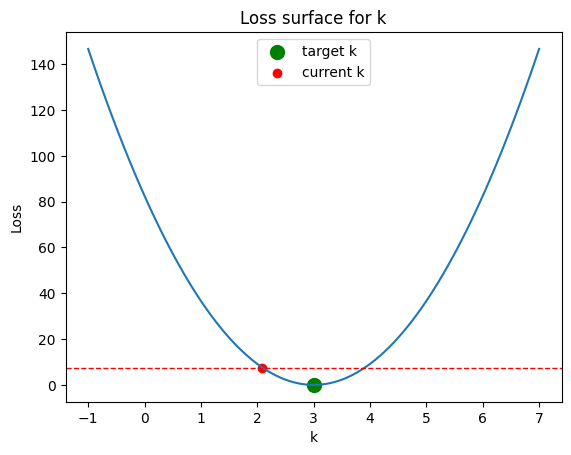

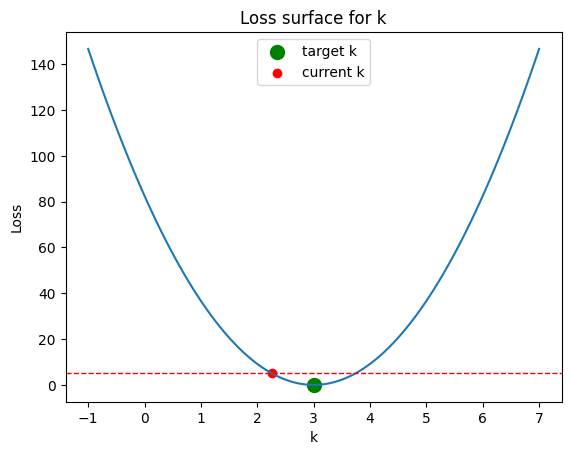

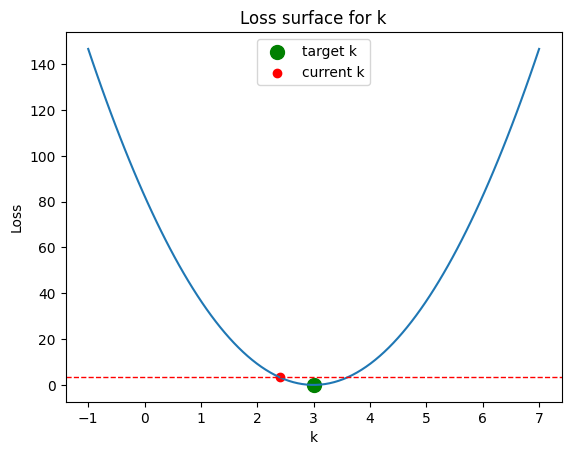

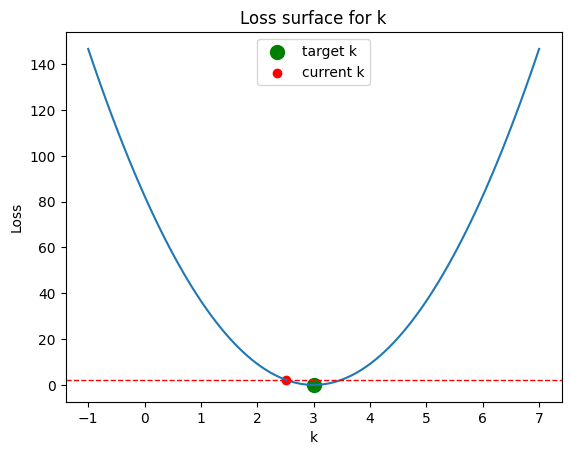

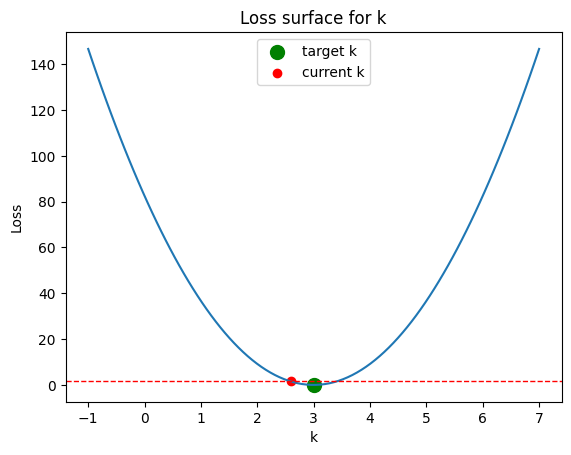

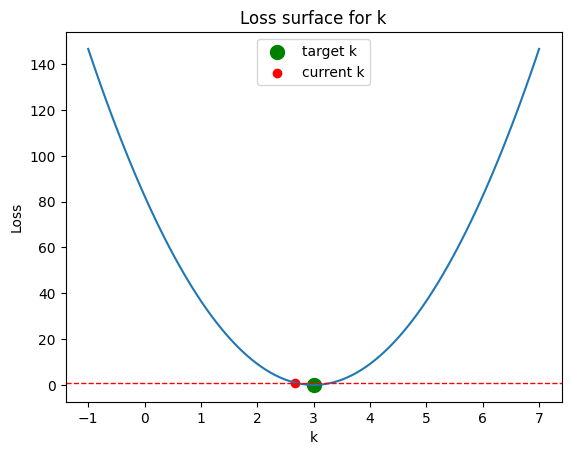

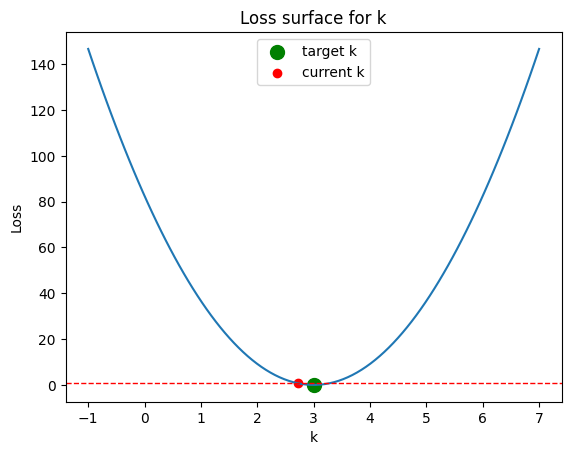

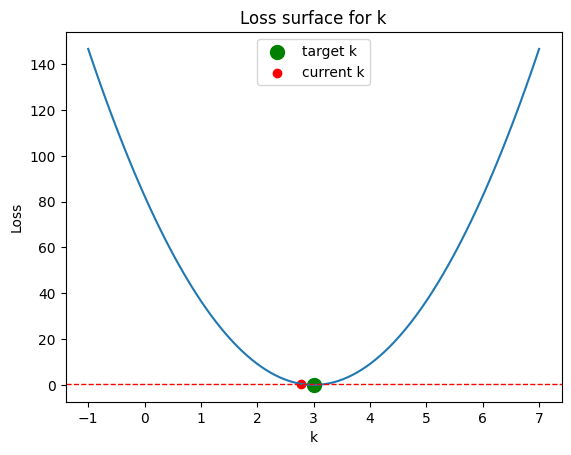

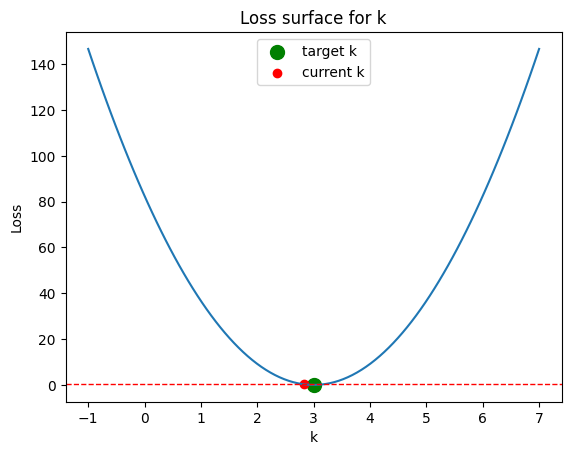

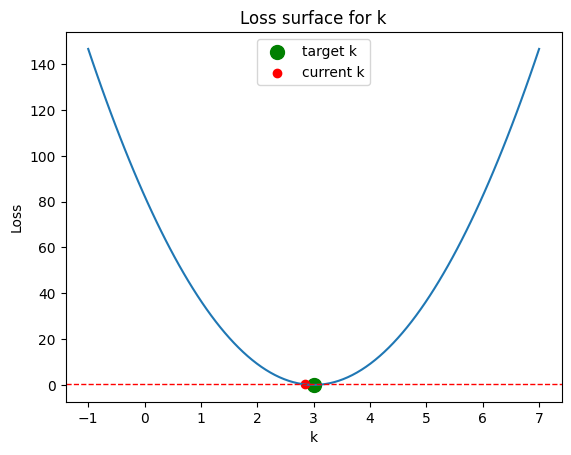

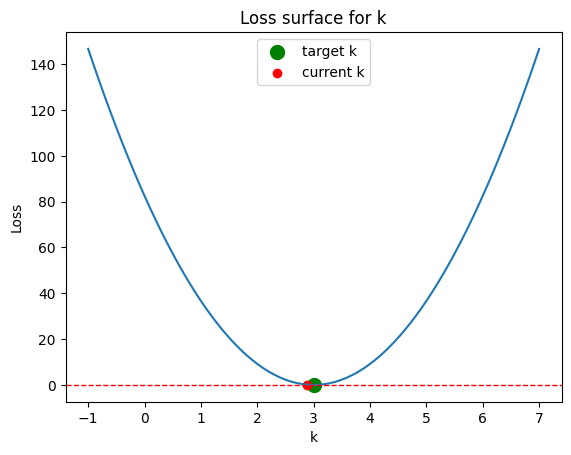

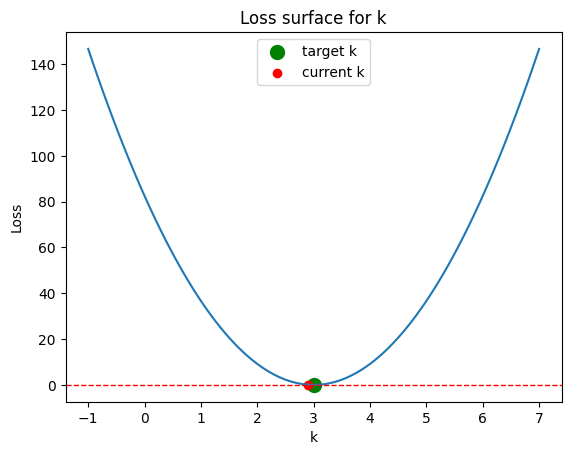

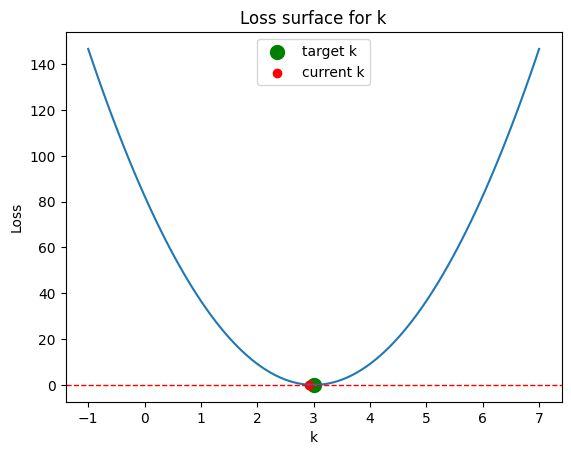

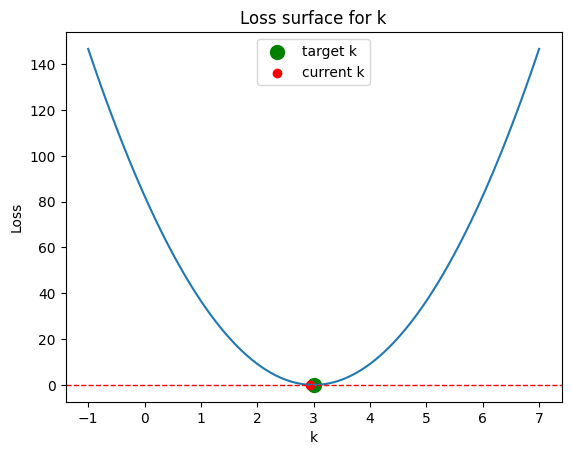

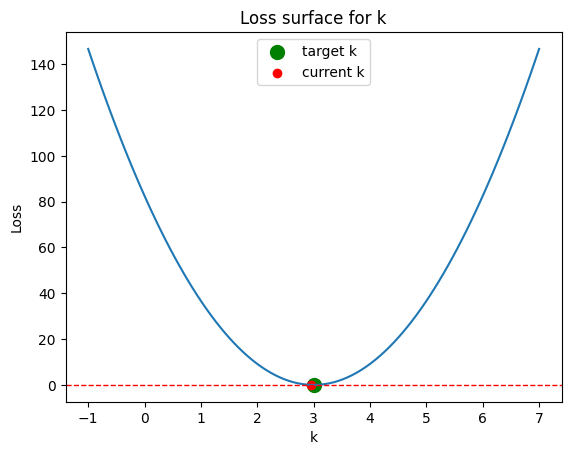

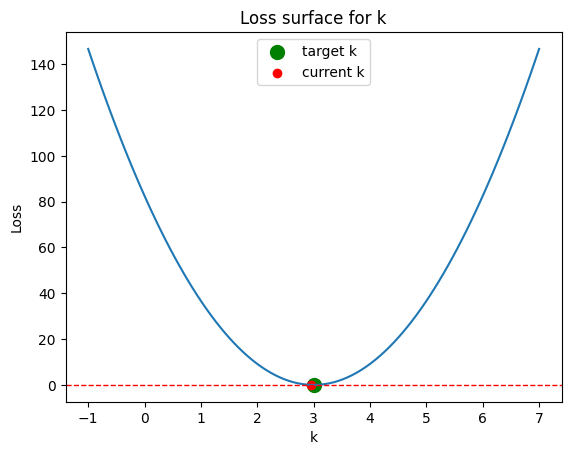

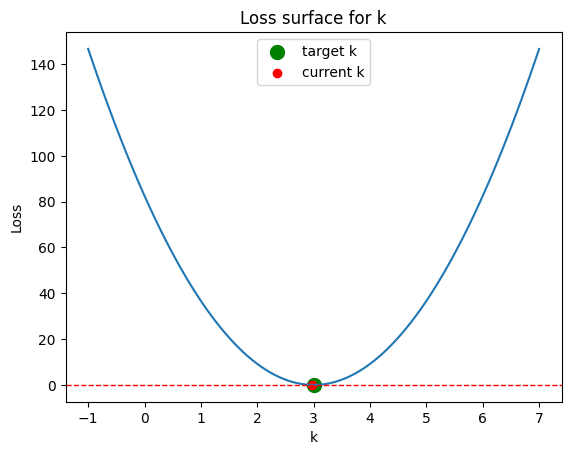

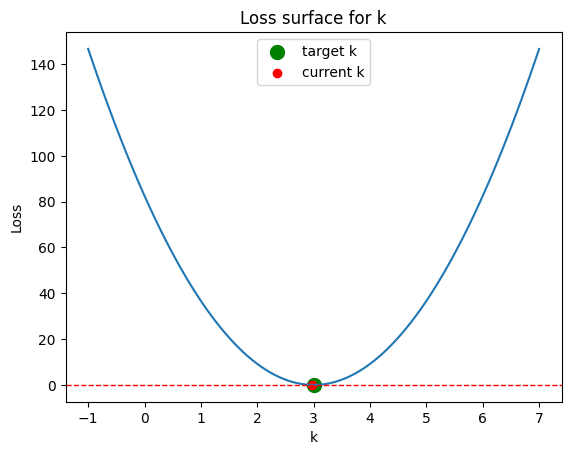

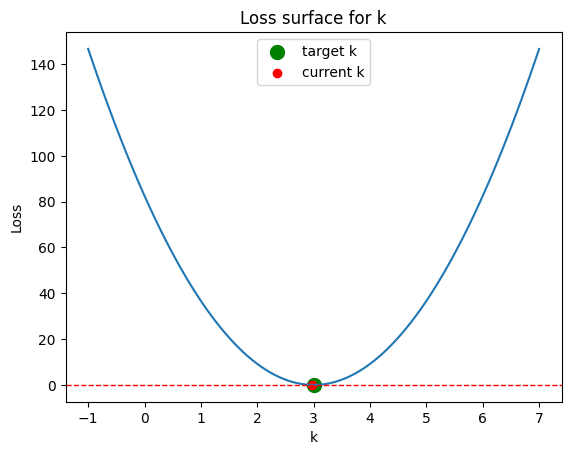

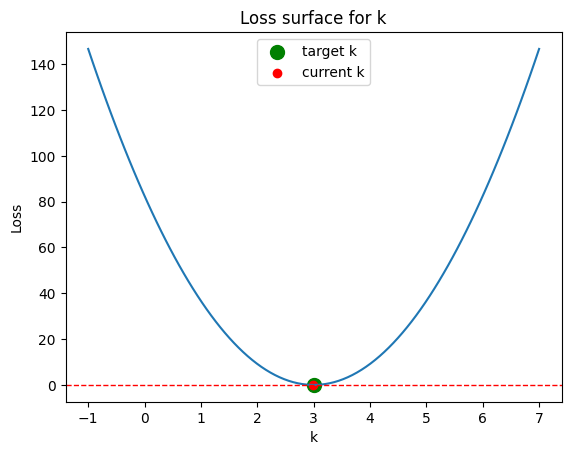

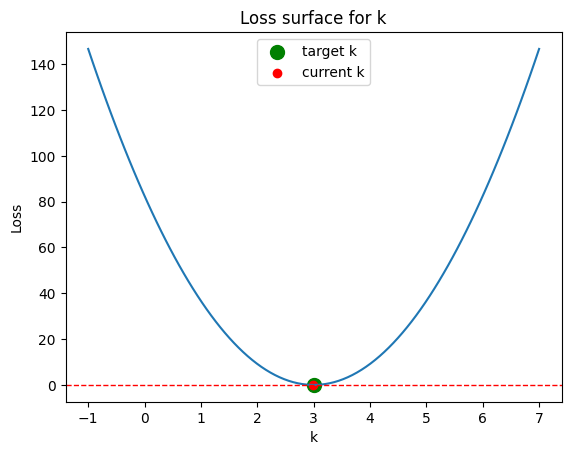

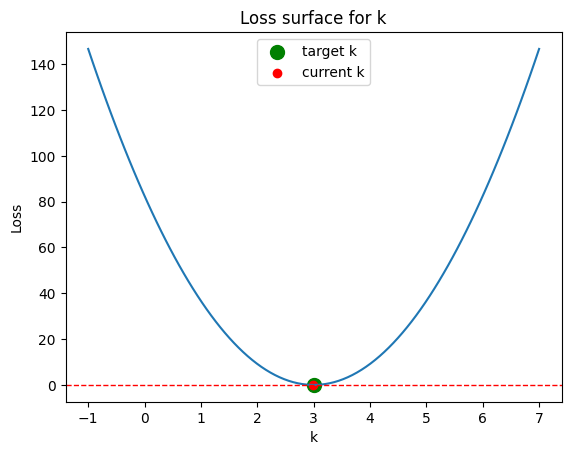

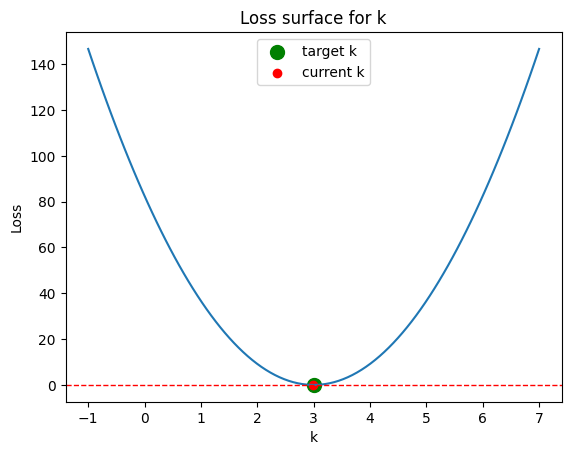

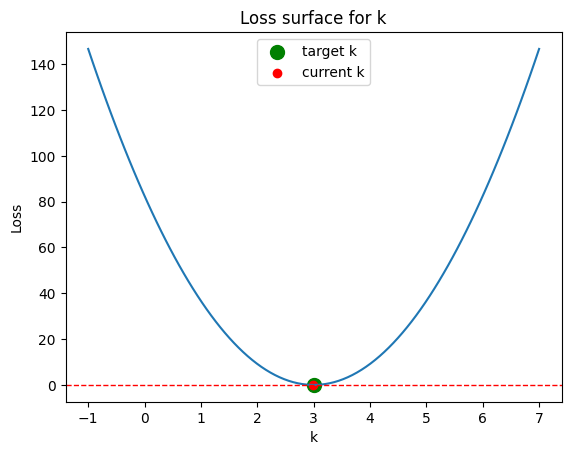

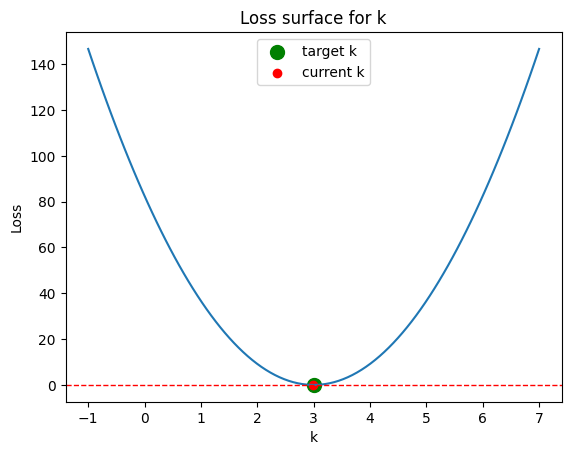

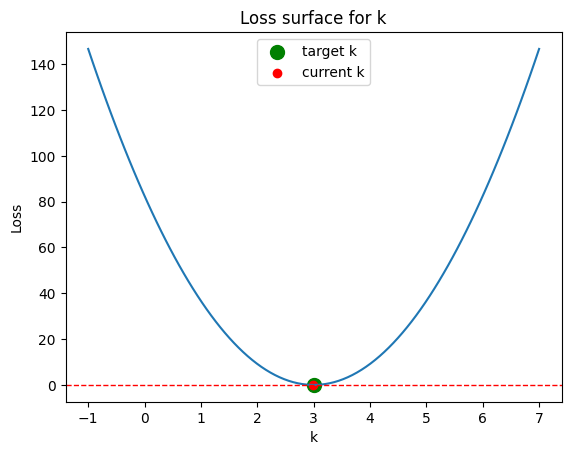

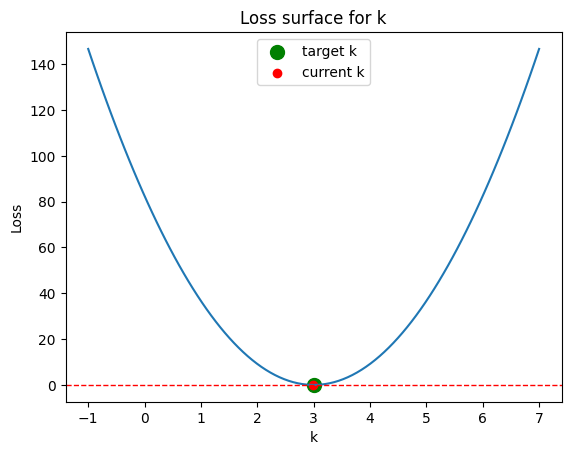

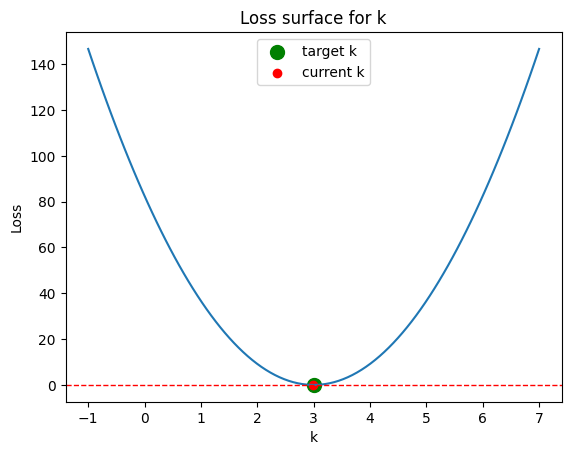

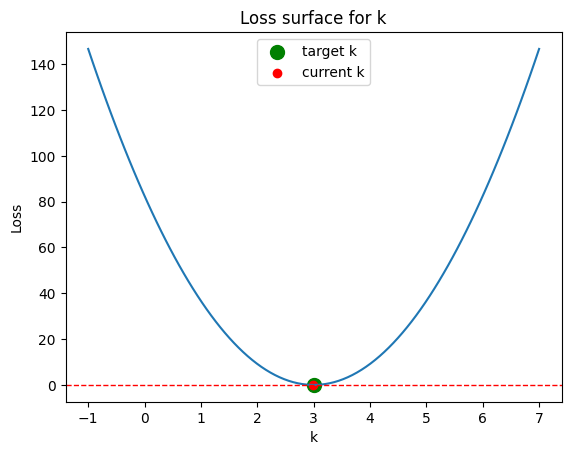

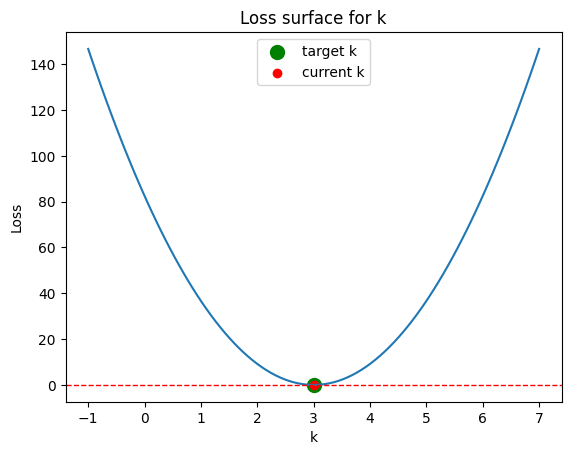

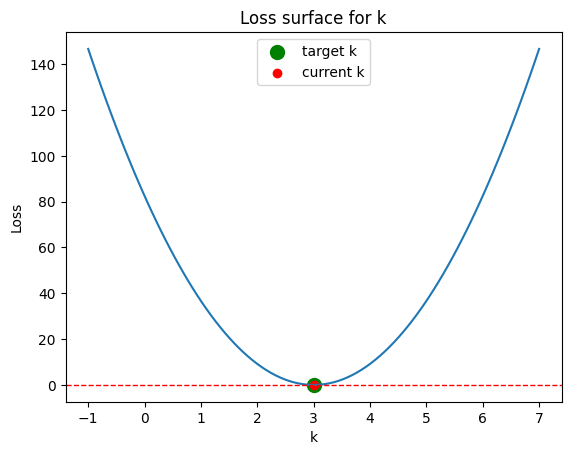

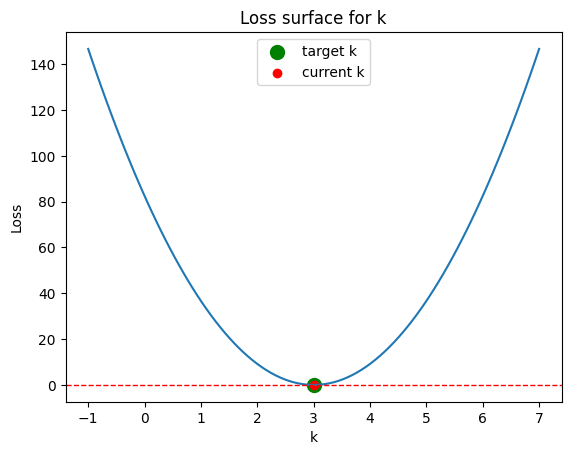

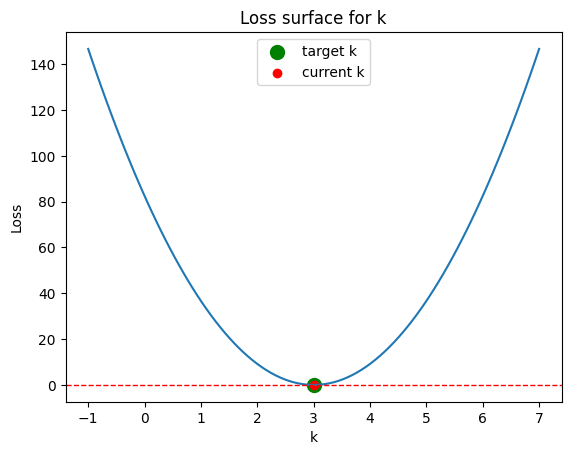

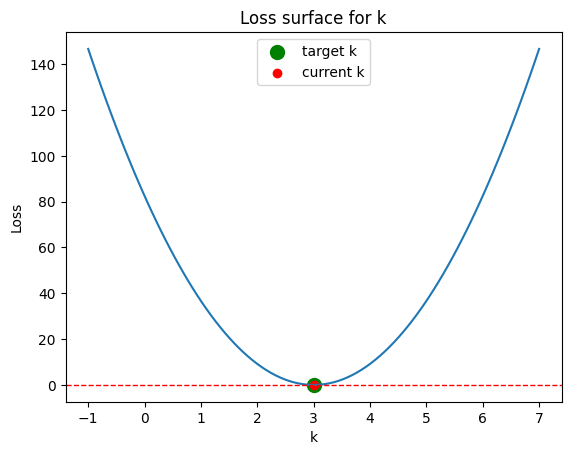

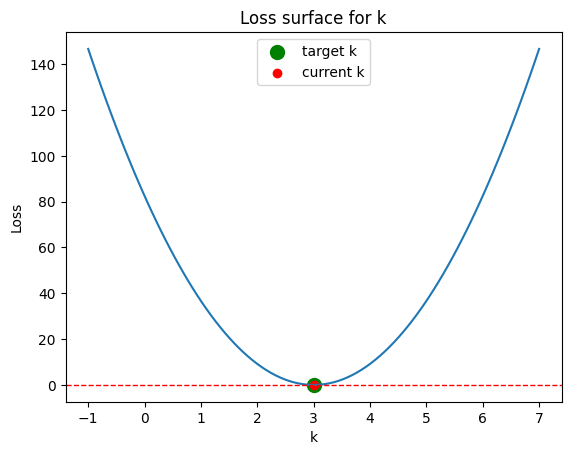

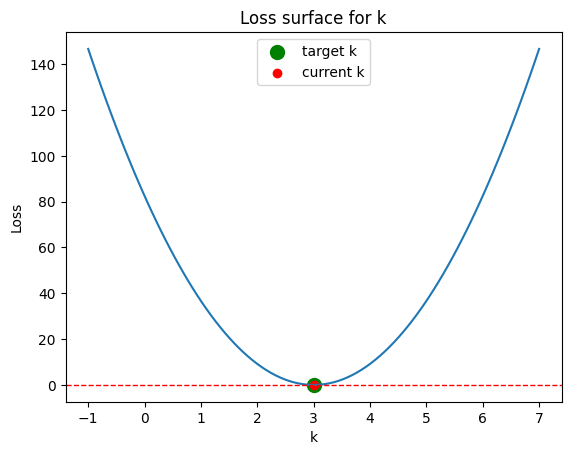

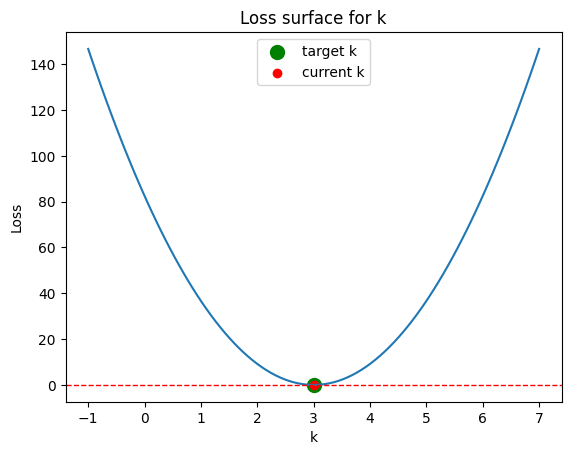

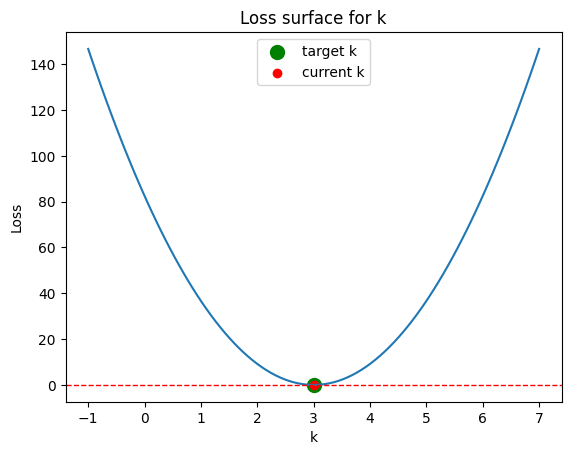

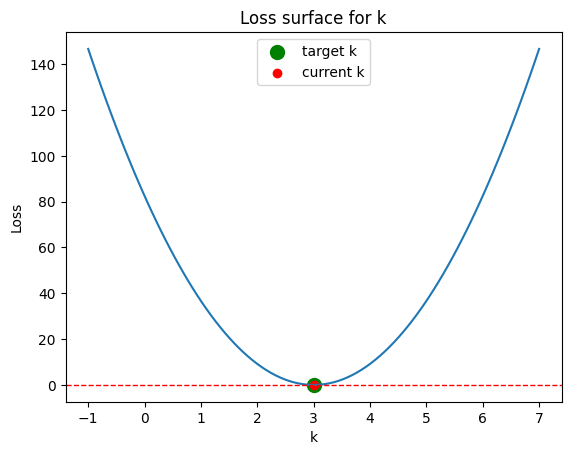

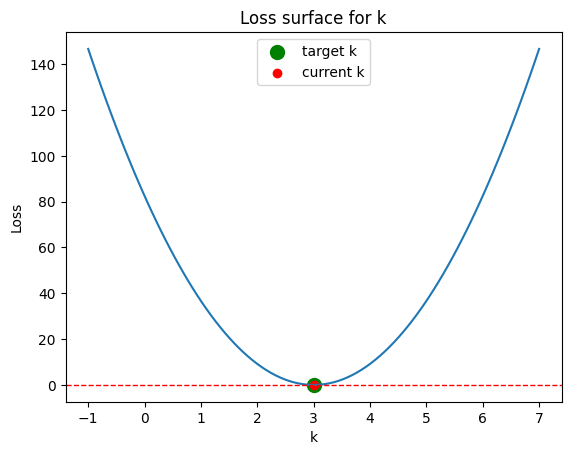

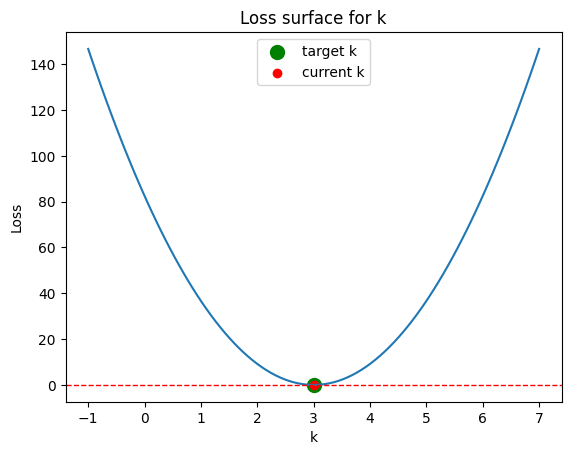

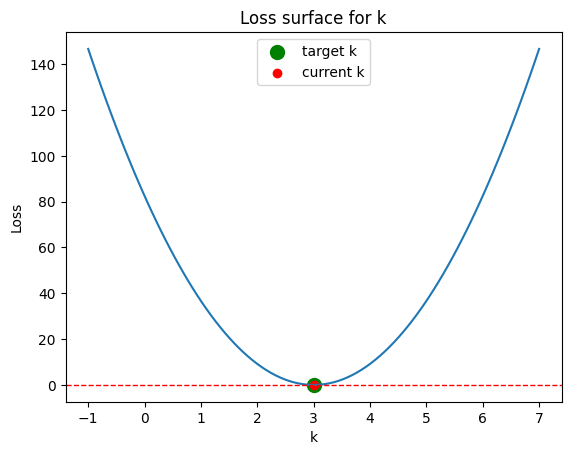

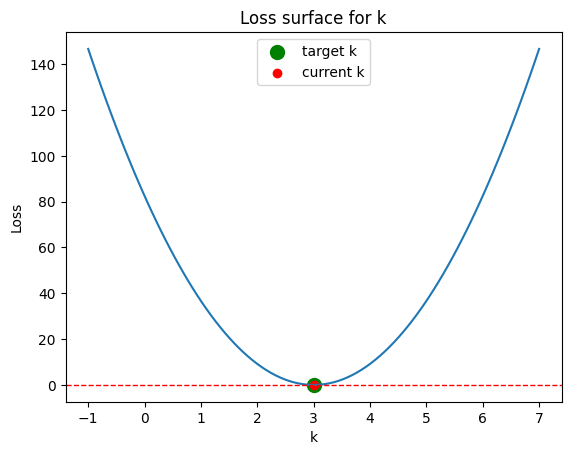

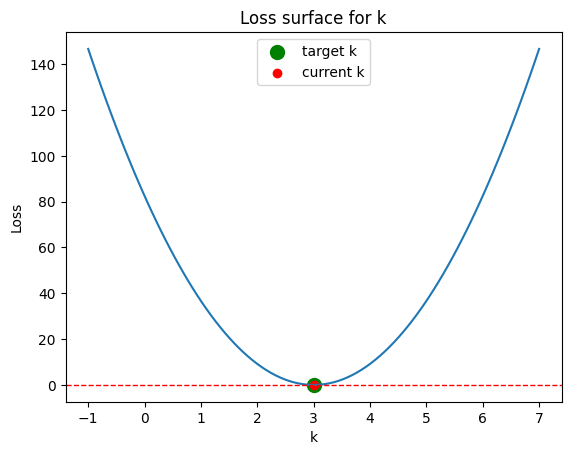

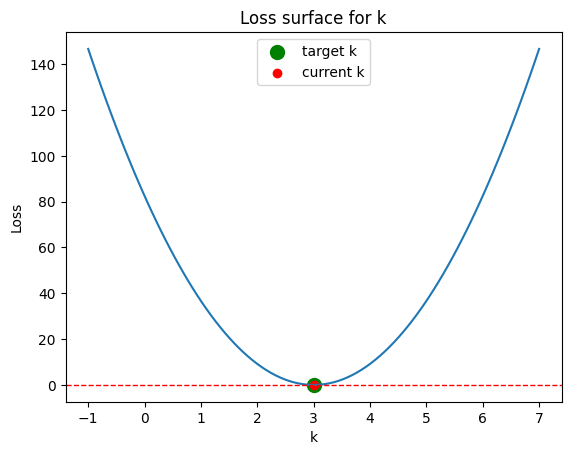

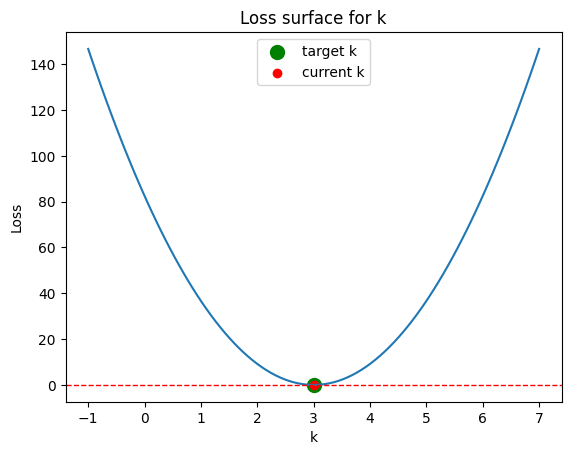

In [30]:
for epoch in range(50):
    y_pred = k * x

    loss = np.mean((y - y_pred) ** 2)

    k_gradient = -2 * np.mean(x * (y - y_pred))
    k -= lr * k_gradient

    history["epoch"].append(epoch)
    history["loss"].append(loss)
    history["k"].append(k)
    history["k_gradient"].append(k_gradient)
    history["lr"].append(lr)
    
    plot_k_loss_surface(k)
    

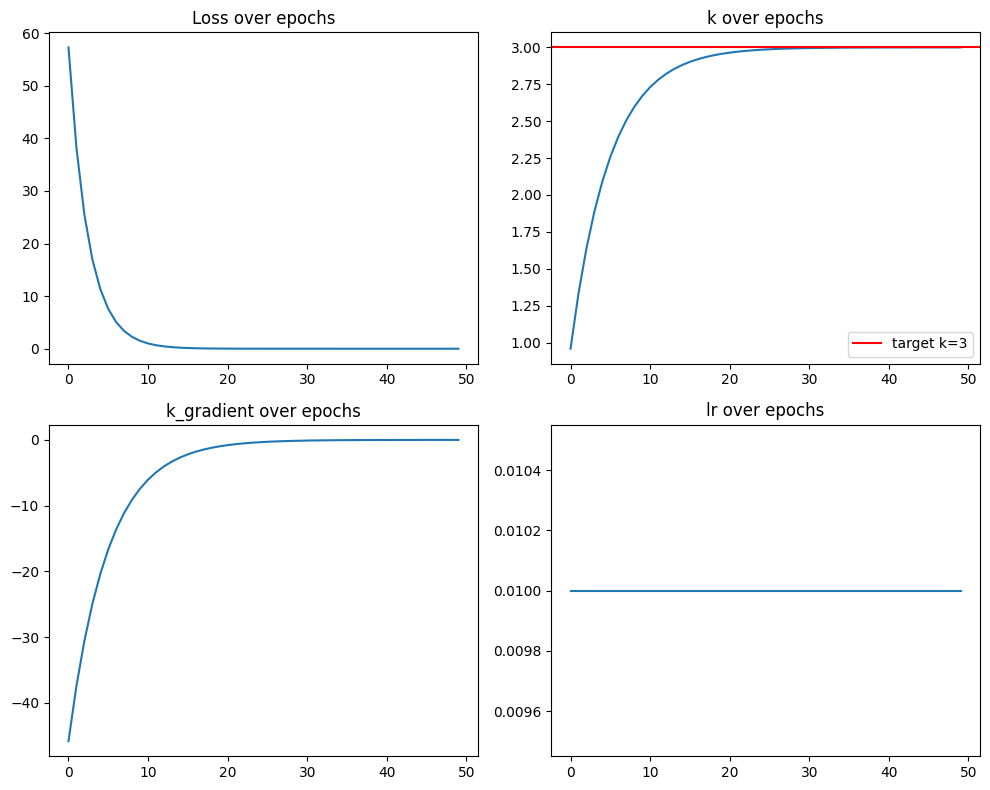

In [31]:
plot_history(history)

In [32]:
show_history(history)

+-------+------------------------+--------------------+------------------------+------+
| epoch |          loss          |         k          |       k_gradient       |  lr  |
+-------+------------------------+--------------------+------------------------+------+
|   0   |   57.291666666666664   | 0.9583333333333334 |  -45.833333333333336   | 0.01 |
|   1   |   38.21035879629628    | 1.332638888888889  |   -37.43055555555555   | 0.01 |
|   2   |   25.484186519418724   | 1.6383217592592594 |  -30.568287037037038   | 0.01 |
|   3   |   16.996536620312316   | 1.8879627700617285 |  -24.964101080246916   | 0.01 |
|   4   |   11.335745673713854   | 2.091836262217078  |   -20.38734921553498   | 0.01 |
|   5   |   7.5603126007186034   | 2.2583329474772804 |  -16.649668526020232   | 0.01 |
|   6   |   5.042308487312603    | 2.394305240439779  |  -13.597229296249859   | 0.01 |
|   7   |   3.362939632788212    | 2.505349279692486  |  -11.104403925270722   | 0.01 |
|   8   |   2.2428939050901406  